### LAB15

In [51]:
import torch
import torchvision
import string

In [52]:
root = "C:/Users/kimin/Documents/STA395/surnames/"
Chinese = open(root+'Chinese.txt', encoding='utf-8').read().strip().split('\n')
Japanese = open(root+'Japanese.txt', encoding='utf-8').read().strip().split('\n')
Korean = open(root+'Korean.txt', encoding='utf-8').read().strip().split('\n')
English = open(root+'English.txt', encoding='utf-8').read().strip().split('\n')
Irish = open(root+'Irish.txt', encoding='utf-8').read().strip().split('\n')
Russian = open(root+'Russian.txt', encoding='utf-8').read().strip().split('\n')

In [53]:
# We'll consider all ascii letters plus basic punctuation
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

## Function to iterate through a line of text encode each letter as a 1 x 57 vector in an nchar x 1 x 57 tensor
def nameToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

In [54]:
## Demonstration of the test name "Aa", notice the "A" is encoded as the 27th position, and "a" is the 1st position
example = nameToTensor('Aa')
print(example)

## Also notice dim1 of the tensor is the number of charactersr in the name
print(example.size())

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]]])
torch.Size([2, 1, 57])


### Question 1

#### Part A

The first dimension of the tensor represents the number of characters in the input name. 

Yes, the size of the dimension will change depending on the input.
If a different name with different number of characters is provided, the size of the first dimension will increase or decrease accordingly. 

For example: "Aa" -> 2. "Aaaaa" -> 5.

#### Part B

The third dimension of the tensor represents the one-hot encoding over the characters, where each 0 corresponds to one character in all_letters.


In [55]:
from torch import nn
class my_rnn(nn.Module):
    
    ## Constructor commands
    def __init__(self, input_size, hidden_size, output_size):
        super(my_rnn, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    ## Function to generate predictions
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(hidden)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [56]:
## Initialize model with random weights
rnn = my_rnn(n_letters, 100, 6)

## Format an example input name (Albert)
test_input = nameToTensor('Albert')

## Provide an initial hidden state (all zeros this time)
hidden = torch.zeros(1, 100)

## Generate output from the RNN
output, next_hidden = rnn(test_input[0], hidden)
print(output)

## Print the top category (predicted class)
output.topk(1)

tensor([[-1.8079, -1.7798, -1.7626, -1.8173, -1.8157, -1.7687]],
       grad_fn=<LogSoftmaxBackward0>)


torch.return_types.topk(
values=tensor([[-1.7626]], grad_fn=<TopkBackward0>),
indices=tensor([[2]]))

### Q2

#### Part A

The value 6 comes from the six nationalities in the dataset. It depends on how we want to set up the problem and should probably not be changed unless we want to change the number of nationalities.


#### Part B

I think 100 is just a chosen design choice; it doesn’t come from the data. We can change it when tuning the model. Larger hidden sizes give the RNN more capacity to learn patterns, but can also make it slower and cause overfitting issues.

### Q3

In [57]:
## List of categories
category_labels = ['Chinese', 'Japanese', 'Korean', 'English', 'Irish', 'Russian']

## Dictionary of categories and names
category_lines = {'Chinese': Chinese,
                 'Japanese': Japanese,
                 'Korean': Korean,
                 'English': English,
                 'Irish': Irish,
                 'Russian': Russian}

In [58]:
## Function to randomly sample a single example
import random
def randomTrainingExample():
    ## Randomly choose a category index (ie: Chinese, etc.)
    category = category_labels[random.randint(0, len(category_labels)-1)]
    
    ## Randomly choose a name in that category
    name = category_lines[category][random.randint(0, len(category_lines[category])-1)]
    
    ## Convert the chosen example to a tensor
    category_tensor = torch.tensor([category_labels.index(category)], dtype=torch.long)
    line_tensor = nameToTensor(name)
    
    return category, name, category_tensor, line_tensor

## Try it out
randomTrainingExample()

('Irish',
 'Farrell',
 tensor([4]),
 tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0.]],
 
         [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [59]:
## Set learning rate
learning_rate = 0.005

## Define cost func
cost_fn = nn.CrossEntropyLoss()

## Training function for a single input (name category, name)
def train(category_tensor, line_tensor):
    
    ## initialize the hidden state
    hidden = rnn.initHidden()
    
    ## set the gradient to zero
    rnn.zero_grad()

    ## loop through the letters in the input, getting a prediction and new hidden state each time
    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    ## Calculate cost and gradients
    cost = cost_fn(output, category_tensor)
    cost.backward()

    # Update parameters
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha = -learning_rate) ## This adds the LR times the gradient to each parameter 

    ## Return the output and cost
    return output, cost.item()

#### Part A

At each iteration, the input is one character of the name. The RNN processes the name sequence one character at a time.

#### Part B

At each iteration, the model outputs probabilities (likely log-scaled due to logsoftmax) over the 6 nationalities and an updated new hidden state according how the for loop was implemented.

#### Part C

Resetting hidden ensures that each name is handled independently. It prevents information from one training example to affect the next one, so that the model learns patterns not across different names.

### Q4

In [60]:
## Initializations
n_iters = 10000
cost_every_n = 25
current_cost = 0
track_cost = []

### Iteratively update model from randomly chosen example
for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, cost = train(category_tensor, line_tensor)
    current_cost += cost
    
    # Save cost every 25 iterations
    if iter % cost_every_n == 0:
        track_cost.append(current_cost/cost_every_n)
        current_cost = 0

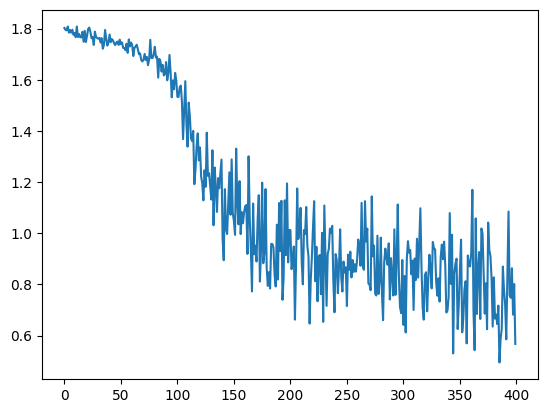

In [61]:
import matplotlib.pyplot as plt
plt.plot(track_cost)
plt.show()

In [62]:
def predict(input_line, n_predictions=4):
    print('\n> %s' % input_line)
    
    ## Don't update gradient with any of these examples
    with torch.no_grad():
        
        ## Initialize new hidden state
        hidden = rnn.initHidden()
        
        ## Convert input str to tensor
        input_t = nameToTensor(input_line)
 
        ## Pass each character into `rnn`
        for i in range(input_t.size()[0]):
            output, hidden = rnn(input_t[i], hidden)

        # Get top N categories from output
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        ## Go through the category predictions and save info for printing
        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, category_labels[category_index]))
            predictions.append([value, category_labels[category_index]])

## Try it out on a few examples:
predict('Dovesky')
predict('Miller')
predict('Satoshi')
predict('ABCDEFGHIJKLMNOP')


> Dovesky
(-0.57) Russian
(-1.16) English
(-2.20) Irish
(-4.54) Japanese

> Miller
(-0.55) English
(-1.24) Irish
(-2.03) Russian
(-6.37) Japanese

> Satoshi
(-0.04) Japanese
(-4.07) Russian
(-4.47) English
(-4.66) Irish

> ABCDEFGHIJKLMNOP
(-0.50) English
(-1.47) Irish
(-1.81) Russian
(-6.65) Korean


### Q4

In [63]:
predict('Zhang')
predict('Maria')



> Zhang
(-0.41) Chinese
(-1.18) Korean
(-4.47) Japanese
(-4.48) Irish

> Maria
(-0.73) Japanese
(-1.04) Russian
(-2.82) Irish
(-2.94) English


I'm not surprised that my last name "Zhang' is more strongly classified as an East Asian name, but I'm surprised that it's the most strongly classified as a Korean name, because as far as I know, 'Zhang' is not a common Korean surname.

I've also been thinking that "Maria" is a Spanish name, but since Spanish is not one of the 6 categories, I thought it should be most strongly classified as either an English or Irish name.

In [64]:
n_categories = len(category_labels)
all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1

In [65]:
from torch import nn

class my_gen_rnn(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(my_gen_rnn, self).__init__()
        self.hidden_size = hidden_size

        self.i2h = nn.Linear(n_categories + input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(n_categories + input_size + hidden_size, output_size)
        self.o2o = nn.Linear(hidden_size + output_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, category, input, hidden):
        input_combined = torch.cat((category, input, hidden), 1)
        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        output_combined = torch.cat((hidden, output), 1)
        output = self.o2o(output_combined)
        output = self.dropout(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [66]:
def inputTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

def outputTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1) 
    return torch.LongTensor(letter_indexes)

def categoryTensor(category):
    li = category_labels.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor

In [67]:
# Random item from a list
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# Get a random category and random line from that category
def randomTrainingPair():
    category = randomChoice(category_labels)
    line = randomChoice(category_lines[category])
    return category, line

# Make category, input, and target tensors from a random category, line pair
def randomTrainingExample():
    category, line = randomTrainingPair()
    category_tensor = categoryTensor(category)
    input_line_tensor = inputTensor(line)
    target_line_tensor = outputTensor(line)
    return category_tensor, input_line_tensor, target_line_tensor

In [68]:
## Try it out
randomTrainingExample()

(tensor([[1., 0., 0., 0., 0., 0.]]),
 tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0.]]]),
 tensor([20, 13, 58]))

In [69]:
max_length = 15
gen_rnn = my_gen_rnn(n_letters, 128, n_letters)

# Sample using a given category and starting letter
def sample(category, start_letter):
    
    ## We are just sampling, so we don't want to store info used in gradient calculations
    with torch.no_grad(): 
        category_tensor = categoryTensor(category)  ## create category tensor of input category
        input = inputTensor(start_letter)           ## intialize input tensor as an encoding of the start letter
        hidden = gen_rnn.initHidden()               ## reset the initial hidden state
        output_name = start_letter                  ## Use start letter as first piece of the output name
        
        ## Loop until reaching the max length or the stop character 
        for i in range(max_length):
            output, hidden = gen_rnn(category_tensor, input[0], hidden)  ## Get the next output and hidden state
            topv, topi = output.topk(1)                                  ## Identify the top predicted character's value and index position
            topi = topi[0][0]                                            ## Extract integer id of predicted char
            if topi == n_letters - 1:                                    ## Stop if its the stop character's ID
                break
            else:
                letter = all_letters[topi]                               ## Convert integer id to the character
                output_name += letter                                    ## Add this character to the output 
            input = inputTensor(letter)                                  ## Prep this letter as the next input

        return output_name

In [70]:
sample('English', 'B')

'BJULJLJLJLJLJLJL'

### Q5

#### Part A

That’s expected. The model is only learning patterns not real surnames, so for many it may generate surnames that sound like real-life names but don't really exist.

#### Part B

Because n_letters - 1 represents EOF. Without an EOF the model will continue forever because it doesn't know when to stop.


In [71]:
cost_fn = nn.CrossEntropyLoss()
gen_rnn = my_gen_rnn(n_letters, 256, n_letters)
learning_rate = 0.001

def train(category_tensor, input_line_tensor, target_line_tensor):
    target_line_tensor.unsqueeze_(-1)
    hidden = gen_rnn.initHidden()

    gen_rnn.zero_grad()
    cost = 0

    for i in range(input_line_tensor.size(0)):
        output, hidden = gen_rnn(category_tensor, input_line_tensor[i], hidden)
        l = cost_fn(output, target_line_tensor[i])
        cost += l

    cost.backward()

    for p in gen_rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, cost.item() / input_line_tensor.size(0)

In [72]:
n_iters = 20000
cost_every_n = 25
current_cost = 0
track_cost = []

for iter in range(1, n_iters + 1):
    cat, il, ol = randomTrainingExample()
    if -1 in ol:                               ### If an example happens to contain an unusual character we'll skip it
        continue  
    output, cost = train(cat, il, ol)
    current_cost += cost
    
    # Save the cost every 25 iterations
    if iter % cost_every_n == 0:
        track_cost.append(current_cost/cost_every_n)
        current_cost = 0


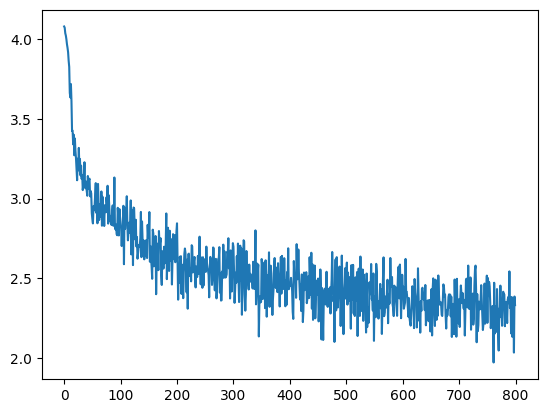

In [73]:
import matplotlib.pyplot as plt
plt.plot(track_cost)
plt.show()

In [74]:
test_letter = 'Pr'
print('Korean:',sample('Korean', test_letter), 
      '\nJapanese:', sample('Japanese', test_letter),
      '\nChinese:', sample('Chinese', test_letter),
      '\nEnglish:', sample('English', test_letter),
      '\nIrish:', sample('Irish', test_letter),
      '\nRussian:', sample('Russian', test_letter))

Korean: Pron 
Japanese: Prakama 
Chinese: Pran 
English: Prarle 
Irish: Prangar 
Russian: Prarkan


### Q6

In [75]:
test_letter = 'Mar'
print('Korean:', sample('Korean', test_letter),
      '\nJapanese:', sample('Japanese', test_letter),
      '\nChinese:', sample('Chinese', test_letter),
      '\nEnglish:', sample('English', test_letter),
      '\nIrish:', sample('Irish', test_letter),
      '\nRussian:', sample('Russian', test_letter))


Korean: Marank 
Japanese: Maraka 
Chinese: Maran 
English: Mararlert 
Irish: Maranan 
Russian: Mararakav


The generated names can actually capture some language-specific spelling patterns, especially for Russian and Irish. Overall, the model seems effective at learning character-level structure, even though it lacks any understanding of meaning or actual name origins.